In [3]:
import numpy as np
np.seterr(all="ignore")
import matplotlib.pyplot as plt

Потенциал задается уравнением:
$$
U(x) = bx^2 - ax^3,\quad a > 0, b > 0
$$

Выразим эти параметры через высоту горба $H$ и расстояния до него $L$. Производная дает нам:
$$
2bL - 3aL^ 2 = 0 \Rightarrow L = \cfrac{2b}{3a} \Rightarrow a = \cfrac{2b}{3L}
$$
Его высота:
$$
H = \cfrac{4b^3}{9a^2} - \cfrac{8b^3}{27a^2} = \cfrac{4b^3}{27a^2} = \cfrac{bL^2}{3} \Rightarrow \boxed{b = \cfrac{3H}{L^2}}
$$
$$
\boxed{a = \cfrac{2H}{L^3}}
$$

$$
U(x) = \cfrac{3Hx^2}{L^2} - \cfrac{2Hx^3}{L^3}
$$
Сила в таком случае:
$$\boxed{
F(x) = -\cfrac{\partial U}{\partial x} = \cfrac{6Hx^2}{L^3} - \cfrac{6Hx}{L^2} = \cfrac{6H}{L}\left[\left(\cfrac{x}{L}\right)^2 - \cfrac{x}{L}\right]}
$$

In [2]:
H = [0.1, 0.5, 2, 10]
L = [0.1, 1, 10]

F = lambda x, l, h : 6 * h / l * ((x / l) ** 2 - x / l)

In [142]:
def simulate(l, h, t, dt=1e-3, limit = False):
    x = np.array([0])
    it = int(t / dt)
    eps = np.sqrt(2 * dt)
    for i in range(it):
        x = np.append(x, x[-1] + eps *np.random.normal() + F(x[-1], l, h) * dt ) 
        if limit and x[-1] > limit:
            return x
    return x


Проведем симуляцию с первым набором данных для 300 точек:

t = 0.00574


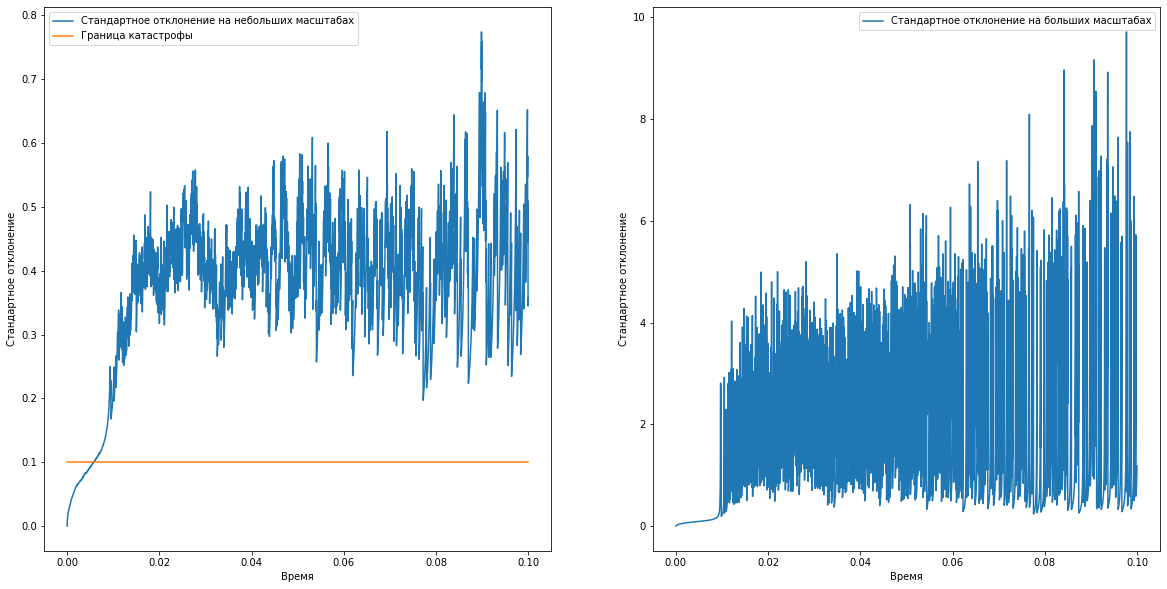

In [130]:

arr = []
for i in range(1000):
    arr.append(simulate(L[0], H[0], 0.1, dt=1e-5))

arr = np.array(arr).T

s1 = []
s2 = []
for i in arr:
    s1.append(np.std(i[i<L[0] * 1000]))
    s2.append(np.std(i[i<L[0] * 50]))

t = np.linspace(0, 0.1, arr.shape[0])
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[1].plot(t, s1, label="Стандартное отклонение на больших масштабах")
ax[1].legend()
ax[1].set_xlabel("Время")
ax[1].set_ylabel("Стандартное отклонение")

ax[0].plot(t, s2, label="Стандартное отклонение на небольших масштабах")
ax[0].plot([t[0], t[-1]], [L[0], L[0]], label="Граница катастрофы")
ax[0].set_xlabel("Время")
ax[0].set_ylabel("Стандартное отклонение")
ax[0].legend()

print(f"t = {t[np.argmin(np.abs(np.array(s2) - L[0]))]}")
plt.show()

Как мы видим, в данной задаче отклонение растет по зависимости близкой к $\sqrt{t}$, как в задаче без потенциала. Это происходит до того момента, как она не достигнет границы потенциального барьера $\sigma = L[0] = 0.1$. После достижения данной границы происходит резкое расхождение, так как частицы начинают улетать на бесконечность, перебежав потенциал.  

Граница перехода горба соответствует времени приблизительно $t = 0.00574$. Построим гистограмму до и после "катастрофы" разлета частиц. 

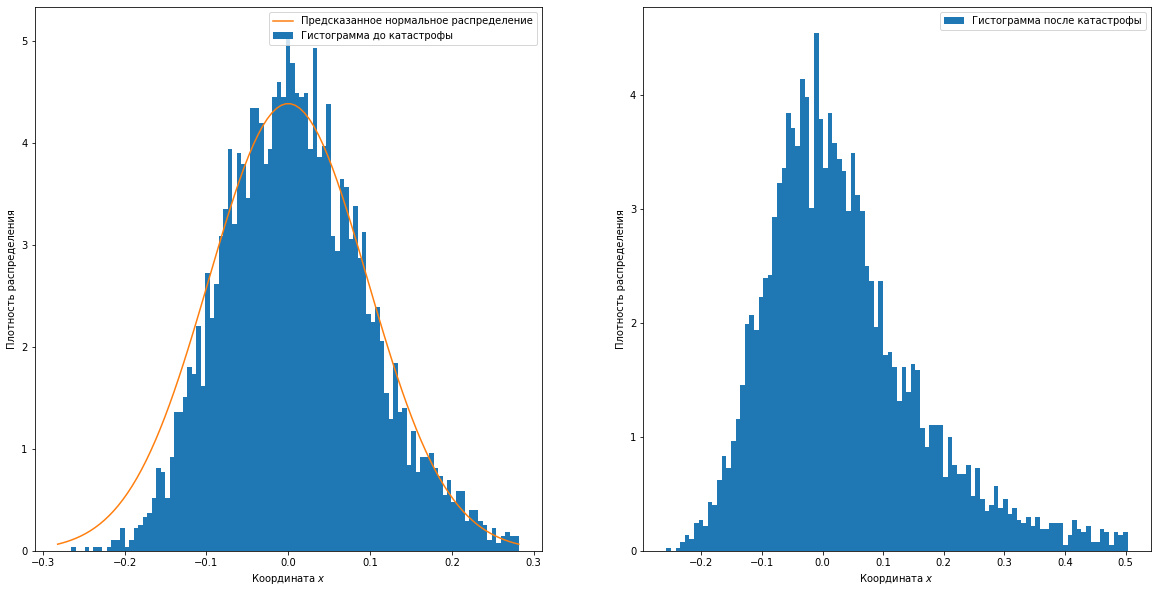

In [120]:

arr = []
for i in range(5000):
    arr.append(simulate(L[0], H[0], 0.01, dt=1e-4))

arr = np.array(arr).T

t = np.linspace(0, 0.1, arr.shape[0])
before = arr[t.shape[0] // 2]
std_before = np.std(before)
after = arr[-1]
x_before = np.linspace(-std_before * 2 - L[0], std_before * 2 + L[0], 100)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].hist(before[before < L[0] + 2 * std_before ], 100, density=True, label="Гистограмма до катастрофы")
ax[0].plot(x_before,1 / np.sqrt(2 * np.pi * std_before ** 2) * np.exp(- x ** 2 / (2 * std_before ** 2)), label="Предсказанное нормальное распределение")
ax[1].hist(after[after < L[0] + 5 * std_after ], 100, density=True, label="Гистограмма после катастрофы")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Координата $x$")
ax[0].set_ylabel("Плотность распределения")
ax[1].set_xlabel("Координата $x$")
ax[1].set_ylabel("Плотность распределения")

plt.show()



Поведение до катастрофы хорошо описывается нормальным распределением. После перехода вершины потенциала плотность распределения больше не приближается нормальной. Далее для всех имеющихся высот и расстояний до локального максимума найдем время перехода.

L =  0.1 , H =  0.1 , t = 0.005205205205205205
L =   1  , H =  0.1 , t = 0.597
L =   10 , H =  0.1 , t = 57.1
L =  0.1 , H =  0.5 , t = 0.004082041020510256
L =   1  , H =  0.5 , t = 0.7949
L =   10 , H =  0.5 , t = 36.0
L =  0.1 , H =   2  , t = 0.0017100000000000001
L =   1  , H =   2  , t = 1.9555
L =   10 , H =   2  , t = 24.0
L =  0.1 , H =   10 , t = 0.0023179999999999997
L =   1  , H =   10 , t = 0.0645964596459646
L =   10 , H =   10 , t = 4.805


[]

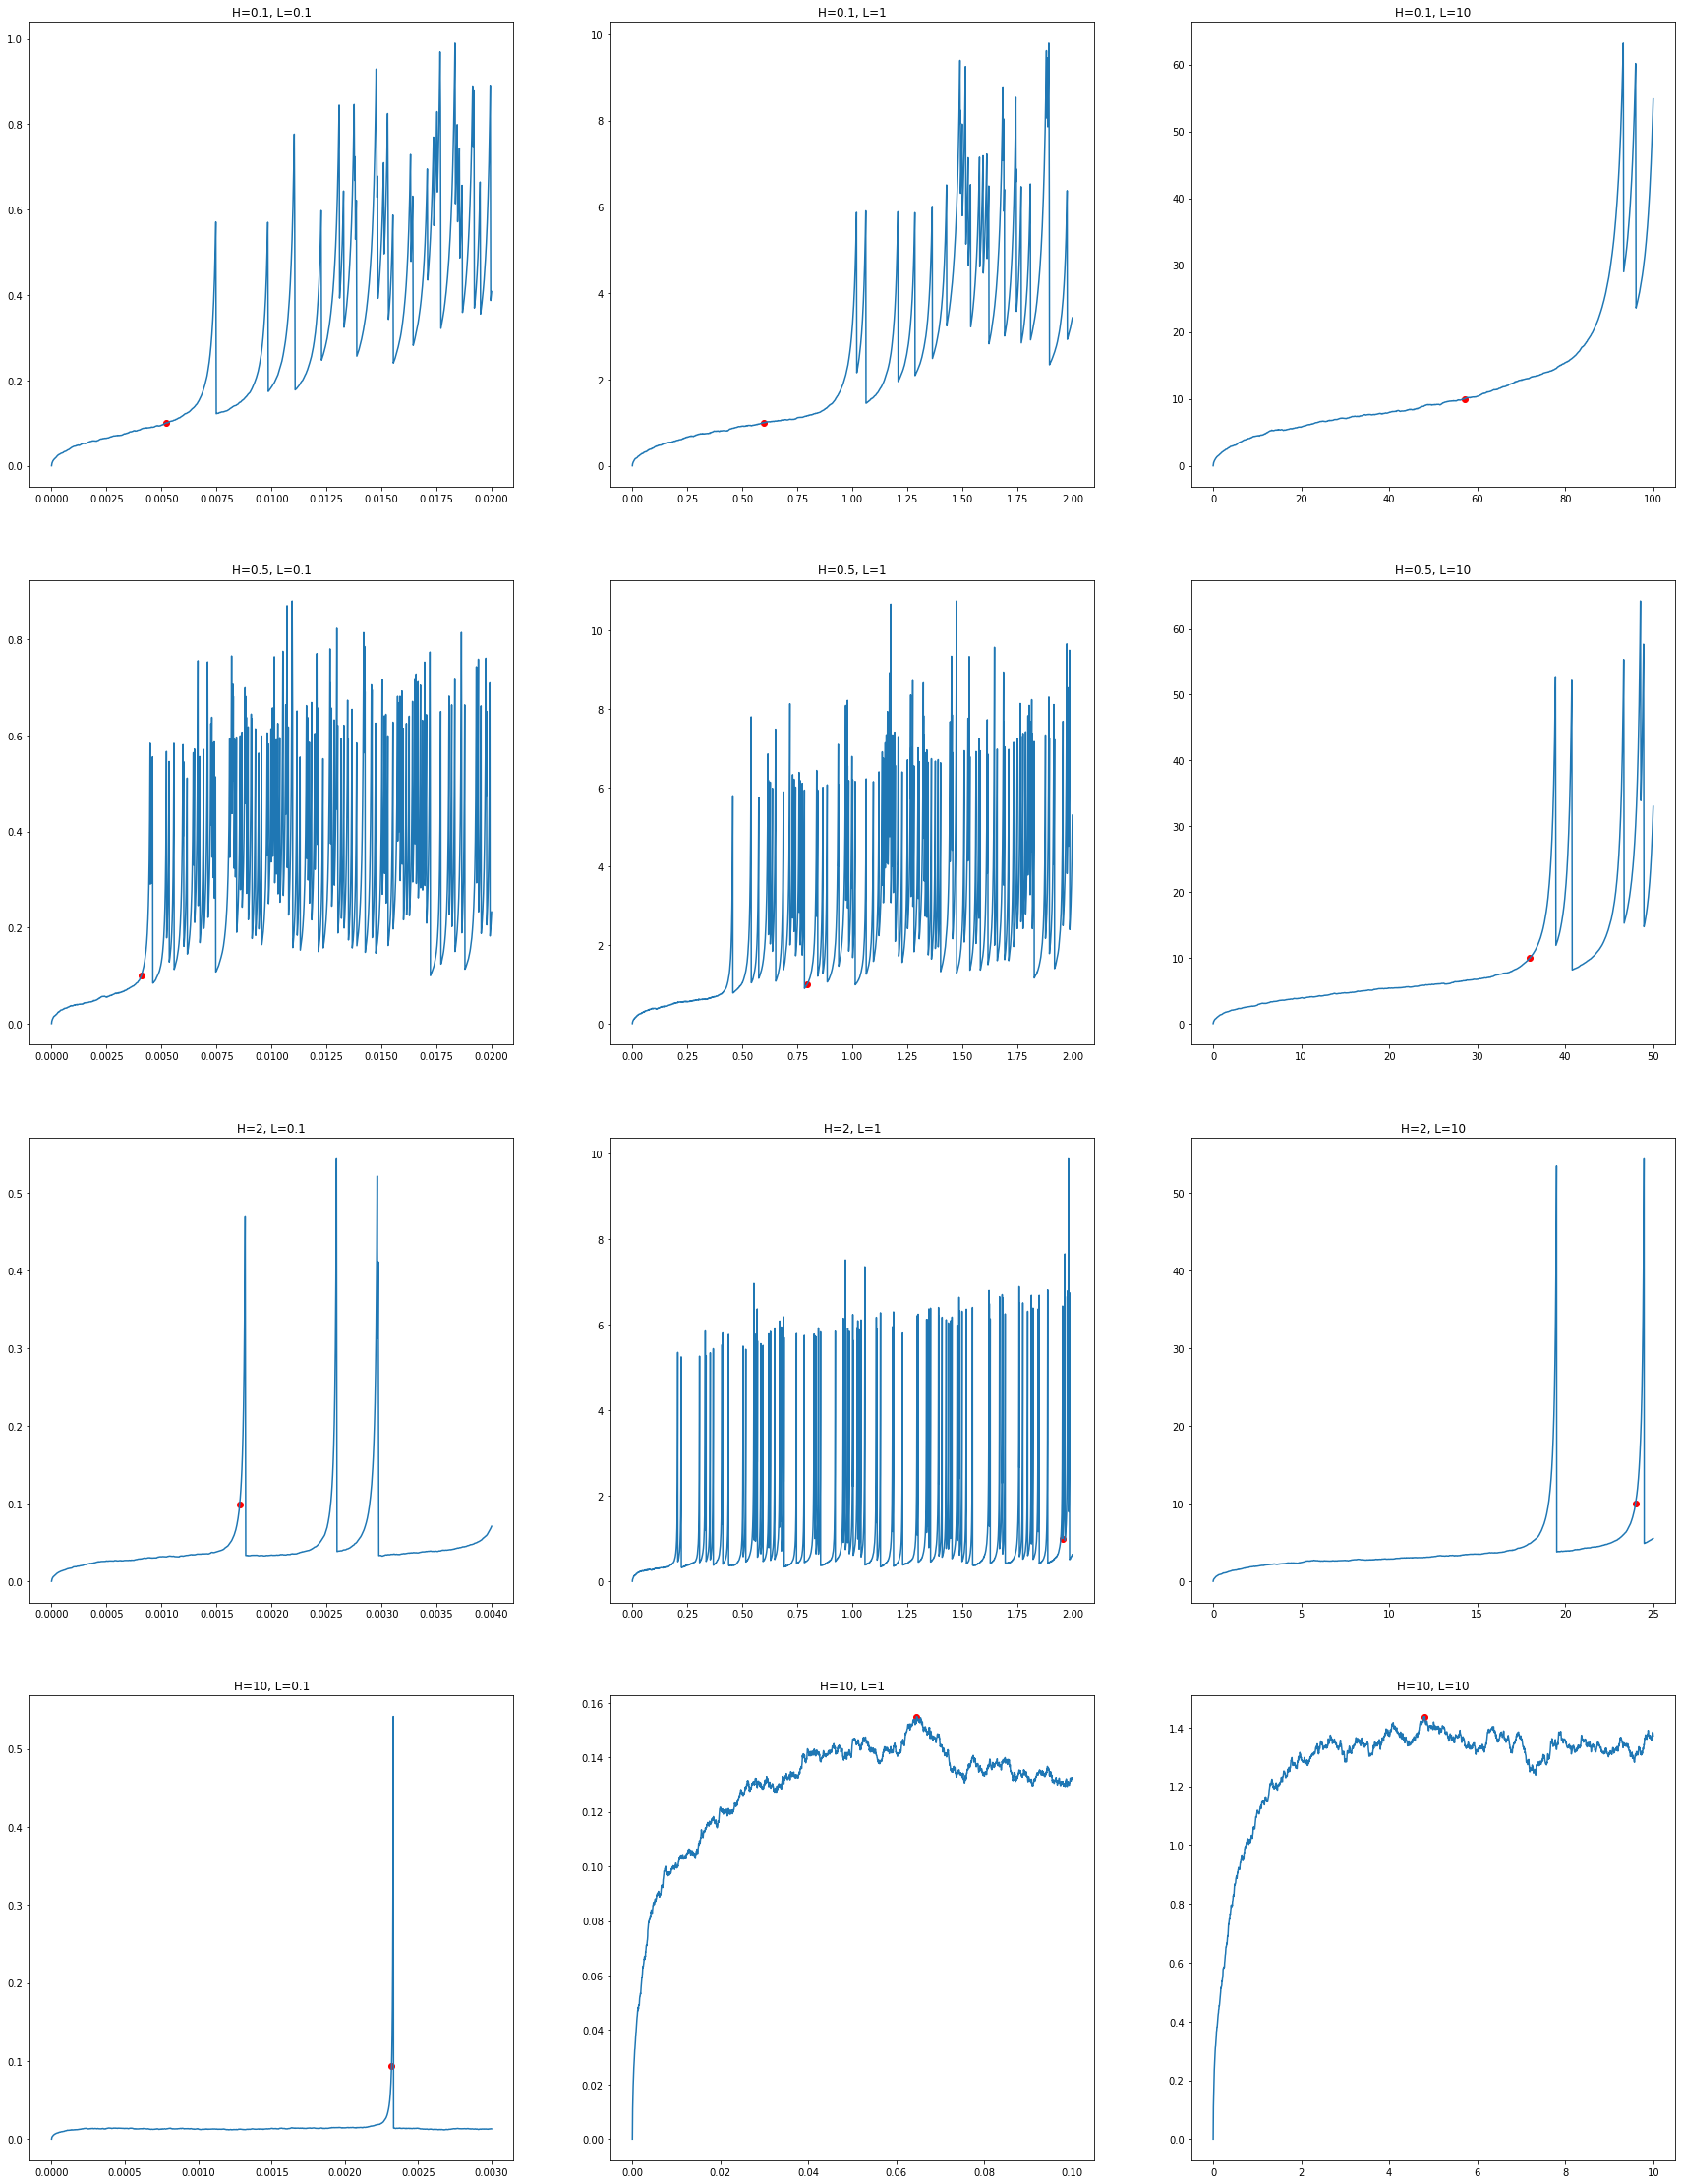

In [134]:
fig, ax = plt.subplots(len(H), len(L), figsize=(30, 40))


# времена окончаний
end = [
        [0.02, 2, 100],
        [0.02, 2, 50],
        [4e-3, 2, 25],
        [3e-3, 0.1, 10],
       ]
# интервалы времени
dts = [
        [2e-5, 1e-3, 1e-1],
        [1e-5, 1e-4, 5e-2],
        [5e-6, 1e-4, 1e-2],
        [2e-6, 3e-5, 5e-3]
       ]

for ii, h  in enumerate(H):
    for jj, l in enumerate(L):
        arr = []
        for i in range(300):
            arr.append(simulate(l, h, end[ii][jj], dt=dts[ii][jj]))

        arr = np.array(arr).T
        t = np.linspace(0, end[ii][jj], arr.shape[0])
        s = []
        for i in arr:
            s.append(np.std(i[i < l * 100]))
        tc = np.argmin(np.abs(np.array(s) - l))
        print(f"L = {str(l).center(5)}, H = {str(h).center(5)}, t = {t[tc]}")
        ax[ii][jj].plot(t, s)
        ax[ii][jj].scatter(t[tc], s[tc], c="red", label="Точка катастрофы")
        ax[ii][jj].set_title(f"H={h}, L={l}")
        ax[ii][jj].legend()
plt.plot()

На большинстве графиков точку катастрофы не удалось хорошо определить - причиной является недостаточное число точек, которые мы рассматриваем (они и вызывают эти пики, так как лишь единицы доходят до нужного значения). 


Найдем распределение времени вылета. Вылетом считаем пересечение барьера на расстоянии L от него с положительной стороны. Для нескольких симуляций найдем эти времена и построим по ним гистограмму:

[0.2 0.2 0.4 ... 0.4 0.4 0.4]
[10.  4.  4. ...  2.  4.  2.]
[220. 100.  20. ... 100.  20.  20.]
[0.2 0.2 0.4 ... 0.2 0.2 0.2]
[4. 2. 2. ... 2. 4. 4.]
[ 60.  40.  20. ... 100.  80.  40.]
[0.2 0.4 0.4 ... 0.2 0.4 0.4]
[2. 4. 4. ... 2. 2. 2.]
[60. 20. 20. ... 20. 20. 20.]
[0.4 0.2 0.2 ... 0.4 0.4 0.4]
[2. 4. 4. ... 4. 4. 4.]
[20. 40. 20. ... 20. 20. 40.]


[]

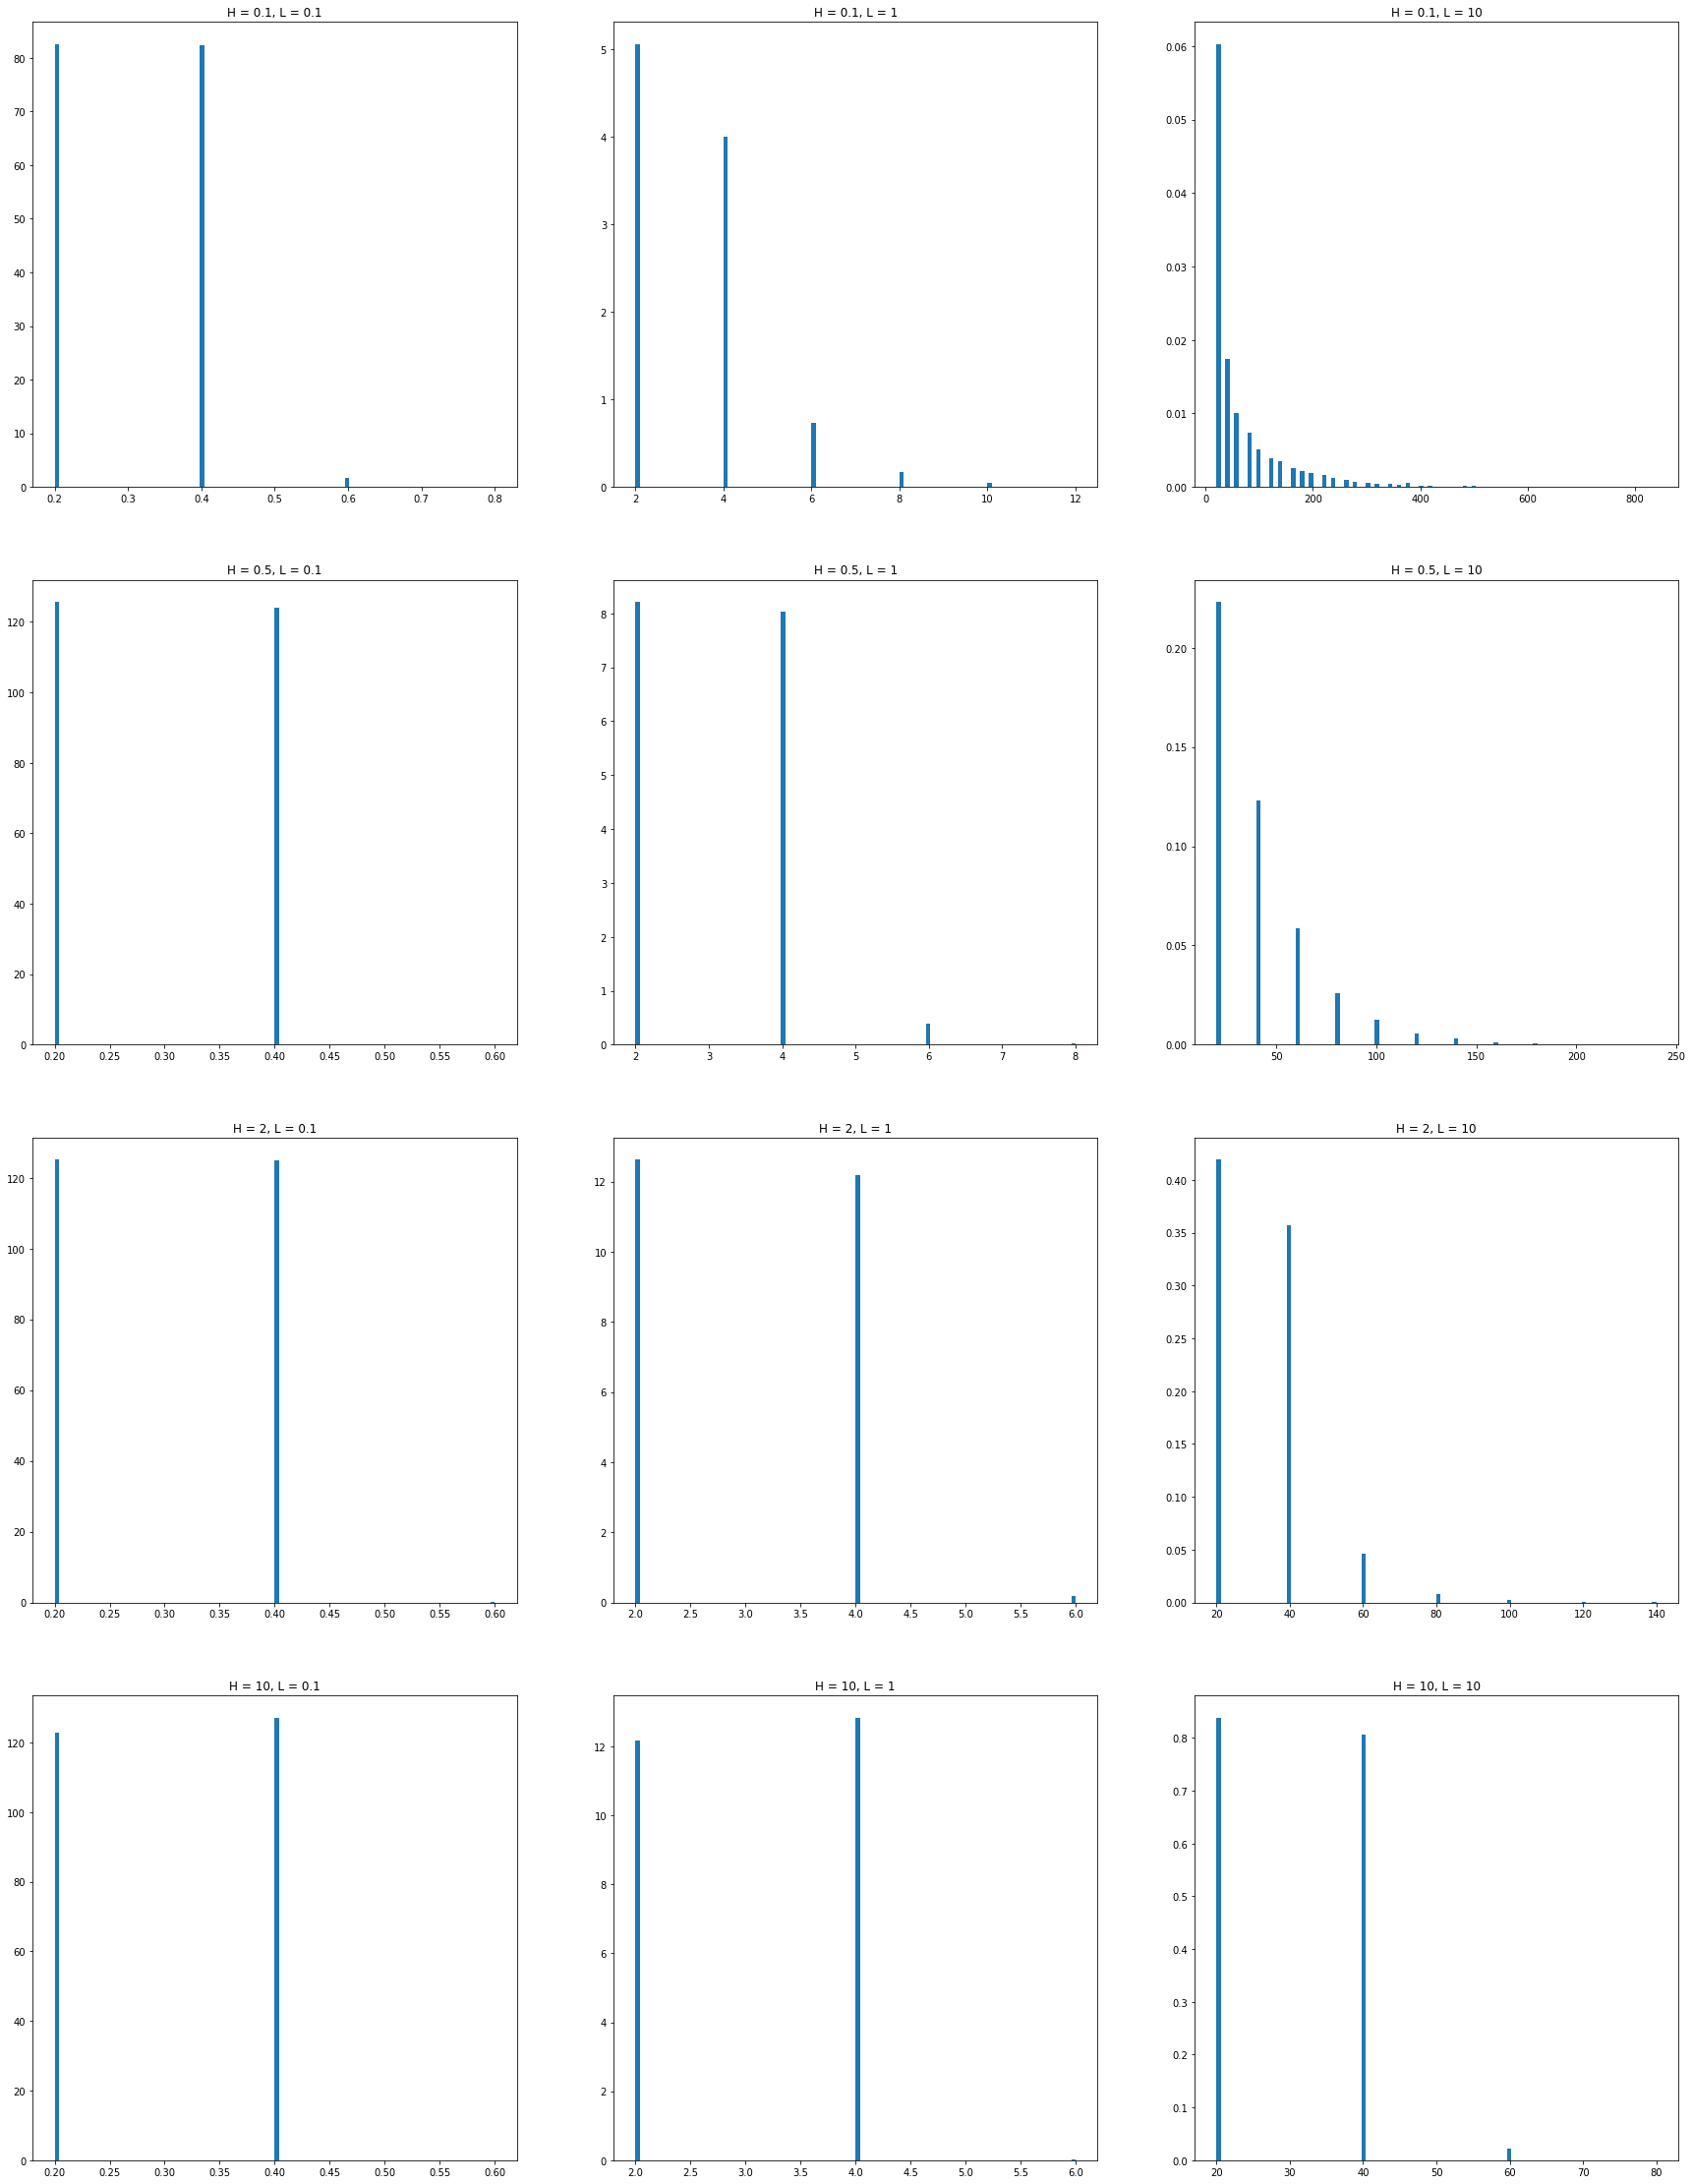

In [9]:
def simulate_new(l, h, limit, dt ):
    x = 0
    t = 0
    eps = np.sqrt(2 * dt)
    while True:
        t += dt
        x += eps * np.random.normal() + F(x, l, h) * dt
        if x > limit:
            return t

# интервалы времени
dts = [
        [2e-5, 1e-3, 1e-1],
        [1e-5, 1e-4, 5e-2],
        [5e-6, 1e-4, 1e-2],
        [2e-6, 3e-5, 5e-3]
       ]

fig, ax = plt.subplots(4, 3, figsize=(30, 40))

for ii, h  in enumerate(H):
    for jj, l in enumerate(L):
        ts = np.array([])
        for i in range(5000):
            ts = np.append(ts, simulate_new(l, h, l * 2, dts[ii][jj] ))
        ts = np.array(ts)
        print(ts)

        ax[ii][jj].hist(ts, 100, density=True)
        ax[ii][jj].set_title(f"H = {h}, L = {l}")
        
plt.plot()